In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

le = preprocessing.LabelEncoder()

In [3]:
#loading the train and test dataset
train_df = pd.read_csv("KDDTrain+.txt")
#train_df

test_df = pd.read_csv("KDDTest+.txt")
#test_df

In [4]:
df = pd.concat([train_df,test_df])
#df.to_csv("test.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,severity_score
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
#Drop severity score column
df = df.drop(['severity_score'], axis = 1)

#assigning the numerical values to class  

new_df=df['class']

                                 
frame=new_df.replace({ 'normal' : 0, 'apache2': 1,'back':1, 'land': 1, 'neptune': 1, 
                                         'mailbomb': 1, 'pod': 1, 'processtable': 1, 'smurf': 1, 
                                         'teardrop': 1,'udpstorm': 1, 'worm': 1,'ipsweep' : 2,
                                         'mscan' : 2, 'nmap' : 2, 'portsweep' : 2,'satan' : 2,
                                         'saint' : 2, 'ftp_write': 3,'guess_passwd': 3,'imap': 3,
                                         'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3, 'warezmaster': 3,
                            'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3, 'xlock': 3,
                            'xsnoop': 3,'httptunnel': 3,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,
                            'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

frame



0        0
1        0
2        1
3        0
4        0
        ..
22539    0
22540    0
22541    1
22542    0
22543    2
Name: class, Length: 148517, dtype: int64

In [6]:
df['class'] = frame
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [7]:
#converting the categorical values into numerical values - protocol_type, service and flag 

df.protocol_type = le.fit_transform(df.protocol_type)
df.service = le.fit_transform(df.service)
df.flag = le.fit_transform(df.flag)

df.protocol_type = df.protocol_type.astype('category')
df.service = df.service.astype('category')
df.flag = df.flag.astype('category')

df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,148517.000000,148517.0,148517.0,148517.0,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
unique,NaN,3.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1.0,24.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,121569.0,48191.0,89820.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,276.779305,NaN,NaN,NaN,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,0.630615
std,2460.683131,NaN,NaN,NaN,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,0.767383
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,NaN,NaN,NaN,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,1.000000


In [8]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
22540,0,1,24,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
22541,0,1,24,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
22542,0,2,12,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [9]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [10]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
22540,0,1,24,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
22541,0,1,24,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
22542,0,2,12,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
22539    0
22540    0
22541    1
22542    0
22543    2
Name: class, Length: 148517, dtype: int64

In [12]:
#Spliting the KDDTrain+ csv file itself into train and test data


from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 80% training and 20% test

In [13]:
print('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (118813, 41) (118813,)
Test set: (29704, 41) (29704,)


In [14]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
15532,0,1,24,9,232,584,0,0,0,0,...,6,255,1.00,0.00,0.17,0.04,0.00,0.0,0.0,0.0
63168,0,1,24,9,217,2226,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
73058,0,1,24,9,208,2335,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
67507,0,1,49,5,0,0,0,0,0,0,...,255,16,0.06,0.06,0.00,0.00,1.00,1.0,0.0,0.0
72929,0,1,24,9,204,1896,0,0,0,0,...,138,255,1.00,0.00,0.01,0.04,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,1,66,5,0,0,0,0,0,0,...,255,19,0.07,0.04,0.00,0.00,1.00,1.0,0.0,0.0
97639,0,1,24,9,296,313,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
95939,0,1,20,5,0,0,0,0,0,0,...,255,5,0.02,0.07,0.00,0.00,1.00,1.0,0.0,0.0
117952,0,1,24,9,293,5017,0,0,0,0,...,20,255,1.00,0.00,0.05,0.07,0.00,0.0,0.0,0.0


In [15]:
X_training=X[:125973]
#X_training
X_testing = X[125973:]
#X_testing
Y_training = Y[:125973]
#Y_training
Y_testing = Y[125973:]
#Y_testing


In [16]:
print('Train set:', X_training.shape,  Y_training.shape)
print ('Test set:', X_testing.shape,  Y_testing.shape)

Train set: (125973, 41) (125973,)
Test set: (22544, 41) (22544,)


## Mutual Information

In [17]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_training, Y_training)
mutual_info

array([5.52850175e-02, 9.23530043e-02, 5.99391376e-01, 5.02786533e-01,
       7.16055354e-01, 4.60217792e-01, 2.77133488e-03, 5.63561762e-03,
       1.13100665e-03, 2.24655048e-02, 2.26179973e-03, 3.10699813e-01,
       6.95023348e-03, 1.31443391e-03, 4.68817690e-03, 2.56433489e-03,
       3.33399001e-03, 2.24246283e-04, 2.75740914e-03, 0.00000000e+00,
       0.00000000e+00, 1.45074291e-02, 4.14034095e-01, 1.61937930e-01,
       3.84164536e-01, 3.62162732e-01, 7.64461541e-02, 5.47982841e-02,
       4.65908403e-01, 5.05808077e-01, 1.43005345e-01, 2.12224073e-01,
       4.15298605e-01, 4.02706144e-01, 4.49674037e-01, 2.36784162e-01,
       2.61635781e-01, 4.01211222e-01, 3.76561097e-01, 9.46946841e-02,
       8.49721784e-02])

In [18]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_training.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.716055
service                        0.599391
diff_srv_rate                  0.505808
flag                           0.502787
same_srv_rate                  0.465908
dst_bytes                      0.460218
dst_host_diff_srv_rate         0.449674
dst_host_srv_count             0.415299
count                          0.414034
dst_host_same_srv_rate         0.402706
dst_host_serror_rate           0.401211
serror_rate                    0.384165
dst_host_srv_serror_rate       0.376561
srv_serror_rate                0.362163
logged_in                      0.310700
dst_host_srv_diff_host_rate    0.261636
dst_host_same_src_port_rate    0.236784
dst_host_count                 0.212224
srv_count                      0.161938
srv_diff_host_rate             0.143005
dst_host_rerror_rate           0.094695
protocol_type                  0.092353
dst_host_srv_rerror_rate       0.084972
rerror_rate                    0.076446
duration                       0.055285


<AxesSubplot:>

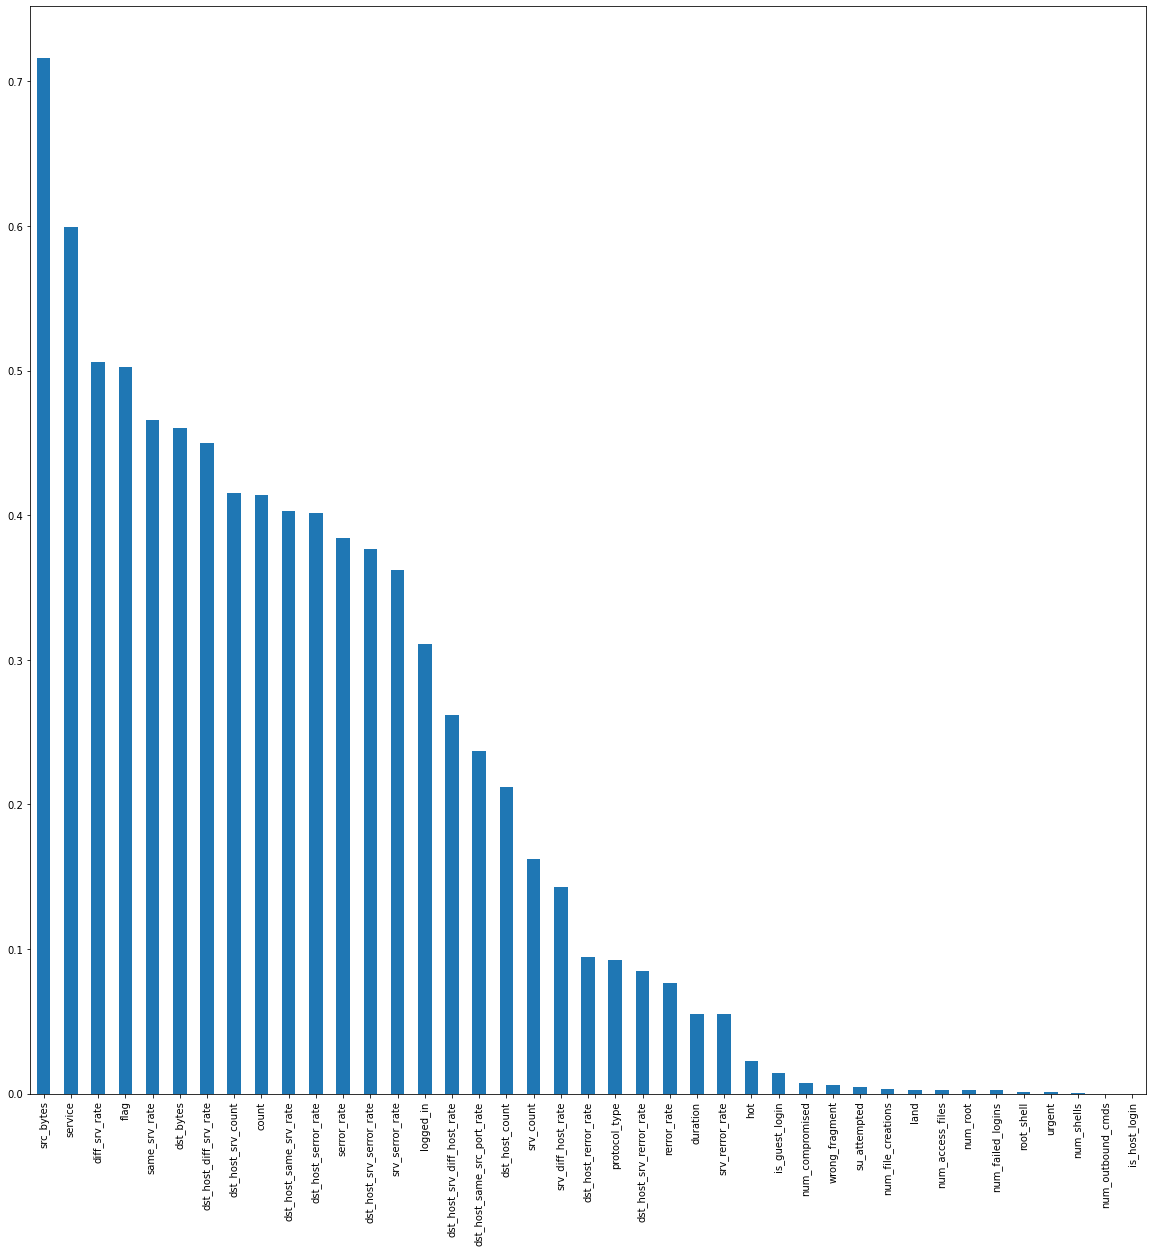

In [19]:
#plotting the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 20))

In [20]:
from sklearn.feature_selection import SelectKBest

In [21]:
#No we Will select the  top 20 important features
sel_cols = SelectKBest(mutual_info_classif, k=36)
sel_cols.fit(X_training, Y_training)
imp_cols=X_training.columns[sel_cols.get_support()]

In [22]:
imp_cols

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'num_root',
       'num_file_creations', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [23]:
X_training_minfo=X_training[imp_cols]

In [24]:
X_training_minfo

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,2,49,9,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,1,54,9,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,1,30,5,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [25]:
X_testing_minfo=X_testing[imp_cols]

In [26]:
X_testing_minfo

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,49,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,1,49,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,1,20,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,0,14,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,1,60,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,1,24,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,1,24,9,54540,8314,0,0,2,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,2,12,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


## Decision tree after Mutual Info


In [27]:
from sklearn import tree
from sklearn import metrics

In [28]:
clf_Tree_mInfo = tree.DecisionTreeClassifier()

In [29]:
clf_Tree_mInfo.fit(X_training_minfo,Y_training)

DecisionTreeClassifier()

In [47]:
Y_pred_Tree_minfo=clf_Tree_mInfo.predict(X_testing_minfo)
Y_pred_Tree_minfo

array([1, 1, 0, ..., 1, 0, 2], dtype=int64)

In [49]:
df_tree_minfo = pd.DataFrame({'Actual': Y_testing, 'Predicted': Y_pred_Tree_minfo})


In [32]:
df_tree_minfo.head(20)

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,2,0
4,2,0
5,0,0
6,0,0
7,3,0
8,0,0
9,3,0


In [33]:
metrics.mean_absolute_error(Y_testing,Y_pred_Tree_minfo)

0.5168115684882896

In [34]:
metrics.accuracy_score(Y_testing,Y_pred_Tree_minfo)

0.7540809084457062

In [35]:
metrics.precision_recall_fscore_support(Y_testing,Y_pred_Tree_minfo, average='weighted')

(0.7924577714987899, 0.7540809084457062, 0.7089669400953592, None)

In [46]:
clf_Tree_mInfo.score(Y_testing,Y_pred_Tree_minfo.values.ravel())

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
#clf_random = RandomForestClassifier(max_depth=20, random_state=0)
clf_random_minfo = RandomForestClassifier(max_depth = 5)

In [39]:
clf_random_minfo.fit(X_training_minfo,Y_training)

RandomForestClassifier(max_depth=5)

In [40]:
Y_pred_random_minfo=clf_random_minfo.predict(X_testing_minfo)

In [41]:
random_df = pd.DataFrame({'Actual': Y_testing, 'Predicted': Y_pred_random_minfo})

In [42]:
random_df

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,2,2
4,2,0
...,...,...
22539,0,0
22540,0,0
22541,1,1
22542,0,0


In [43]:
metrics.mean_absolute_error(Y_testing,Y_pred_random_minfo)

0.5648953158268275

In [44]:
metrics.accuracy_score(Y_testing,Y_pred_random_minfo)

0.7368701206529453

In [45]:
metrics.precision_recall_fscore_support(Y_testing,Y_pred_random_minfo, average='weighted')

c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.6816429333817885, 0.7368701206529453, 0.6877977469268044, None)